In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [2]:
data = pd.read_csv(r'/kaggle/input/student-final-grade-prediction-multi-lin-reg/student-mat.csv')

In [3]:
data.isnull().sum()

school                      0
sex                         0
age                         0
address                     0
famsize                     0
Parrent_status              0
Mother_edu                  0
Father_edu                  0
Mother_job                  0
Father_job                  0
reason_to_chose_school      0
guardian                    0
traveltime                  0
weekly_studytime            0
failures                    0
extra_edu_supp              0
family_edu_supp             0
extra_paid_class            0
extra_curr_activities       0
nursery                     0
Interested_in_higher_edu    0
internet_access             0
romantic_relationship       0
Family_quality_reln         0
freetime_after_school       0
goout_with_friends          0
workday_alcohol_consum      0
weekend_alcohol_consum      0
health_status               0
absences                    0
G1                          0
G2                          0
G3                          0
dtype: int

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Mother_edu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Father_edu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
weekly_studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
Family_quality_reln,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime_after_school,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout_with_friends,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
workday_alcohol_consum,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    int64 
 14  failures                  

In [6]:
data.head(5)

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


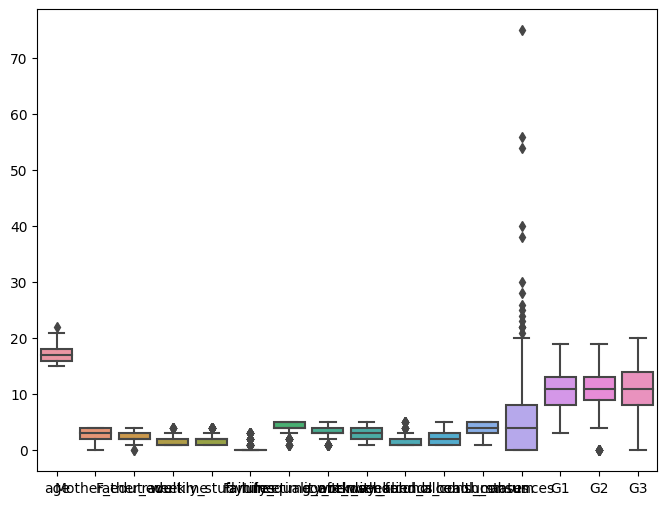

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(data)
plt.show()

# Məlumatın Hazırlanması

In [8]:
def encoder(data):
    encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = encoder.fit_transform(data[col])
    return data

In [9]:
data = encoder(data)

In [10]:
def normalizer(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    for col in data.columns:
        data[col] = data[col].apply(lambda x: upper_bound[col] if x > upper_bound[col] else (lower_bound[col]) if x < lower_bound[col] else x )
        data = pd.DataFrame(data)
    return data

In [11]:
data = normalizer(data)

In [12]:
def scaler(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return pd.DataFrame(data_scaled, columns = data.columns)

In [13]:
data = scaler(data)

# Modelin Qurulmasi

In [14]:
X = data.drop(columns='G3', axis=1)
y = data['G3']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model = Lasso()
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]  # Lasso cəza parametrini fərqli qiymətlərlə yoxlamaq
}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'En Yaxsi Parametr:\n{best_params}')

En Yaxsi Parametr:
{'alpha': 0.1}


In [17]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performansin Qiymetlendirilmesi

In [18]:
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
print(f'R2:\n{R2*100:.0f}%\nMSE:\n{MSE}')

R2:
79%
MSE:
0.2029554535964244


# Visualization

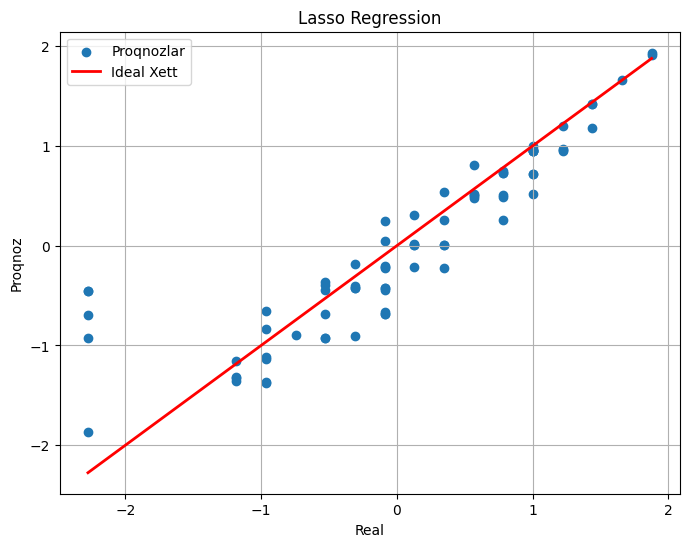

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,marker='o',label='Proqnozlar')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='r', linewidth=2, label='Ideal Xett' )
plt.title('Lasso Regression')
plt.xlabel('Real')
plt.ylabel('Proqnoz')
plt.legend()
plt.grid()
plt.show()